In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=6
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me break down the Hamiltonian and understand the problem.

This is the Emery model Hamiltonian in a mean-field approximation. It describes copper-oxide planes in high-Tc superconductors.

First, let's identify the flavors and the basis order.

From the Hamiltonian, we can see that:
- $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ is a 3-component vector where each component represents a different orbital: p_x, p_y, and d.
- The subscript "s" suggests there is a spin component involved.
- $\HH_{\kk s}$ is a 3x3 matrix, suggesting there are 3 orbitals.

So, we have two flavor types:
1. Spin (presumably spin up and spin down, so |spin| = 2)
2. Orbital (p_x, p_y, d, so |orbital| = 3)

This means D = (|spin|, |orbital|) = (2, 3).

Now, let's identify the basis order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

Next, let's identify the interacting terms and exp_val dep

In [7]:
print(generated_code['thinking'])

Let me break down the Hamiltonian and understand the problem.

This is the Emery model Hamiltonian in a mean-field approximation. It describes copper-oxide planes in high-Tc superconductors.

First, let's identify the flavors and the basis order.

From the Hamiltonian, we can see that:
- $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ is a 3-component vector where each component represents a different orbital: p_x, p_y, and d.
- The subscript "s" suggests there is a spin component involved.
- $\HH_{\kk s}$ is a 3x3 matrix, suggesting there are 3 orbitals.

So, we have two flavor types:
1. Spin (presumably spin up and spin down, so |spin| = 2)
2. Orbital (p_x, p_y, d, so |orbital| = 3)

This means D = (|spin|, |orbital|) = (2, 3).

Now, let's identify the basis order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

Next, let's identify the interacting terms and exp_val dependent terms.

From the Hamiltonian, we can see that 

In [8]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

2) EXP-VAL DEPENDENT TERMS: {
    "n^p": "Total density of holes on oxygen sites (p_x and p_y orbitals)",
    "η": "Nematic order parameter (difference between p_x and p_y hole densities)"
}

TERMS:
- γ_1(k_x) * p^†_x d + h.c. -> H[s, 0, s, 2, k], NI
- γ_1(k_y) * p^†_y d + h.c. -> H[s, 1, s, 2, k], NI
- γ_2(k) * p^†_x p_y + h.c. -> H[s, 0, s, 1, k], NI
- (Δ + Ũ_p * n^p/4 - Ṽ_pp * η/4 - μ) * p^†_x p_x -> H[s, 0, s, 0, k], I
- (Δ + Ũ_p * n^p/4 + Ṽ_pp * η/4 - μ) * p^†_y p_y -> H[s, 1, s, 1, k], I
- (Ũ_d * (n-n^p)/2 - μ) * d^† d -> H[s, 2, s, 2, k], I

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for the Emery model describing copper-oxide planes in high-Tc superconductors.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): 

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for the Emery model describing copper-oxide planes in high-Tc superconductors.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor for the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_pd': 1.0, 't_pp': 0.5, 'Delta': 3.0, 'U_p': 4.0, 'V_pp': 1.0, 'V_pd': 1.0, 'U_d': 8.0, 'n': 1.0, 'T': 0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'square'  # Lattice symmetry
        self.D = (2, 3)  # Number of flavors (spin, orbital)
        self.basis_order = {'0': 'spin', '1': 'orbital'}
        # Order for each flavor:
        # 0: spin up, spin down
        # 1: p_x, p_y, d
        
        # Occupancy relevant parameters
        self.nu = filling_factor
       

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_6.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

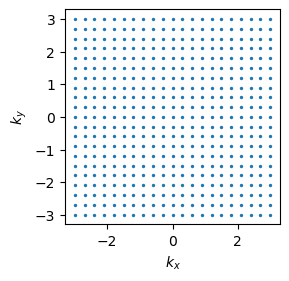

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

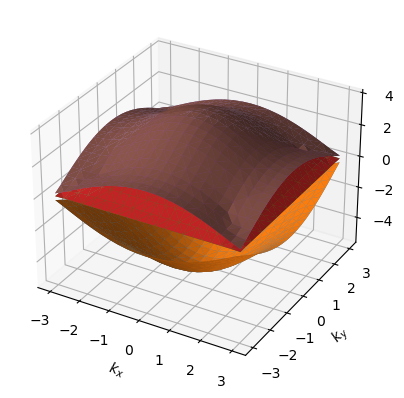

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

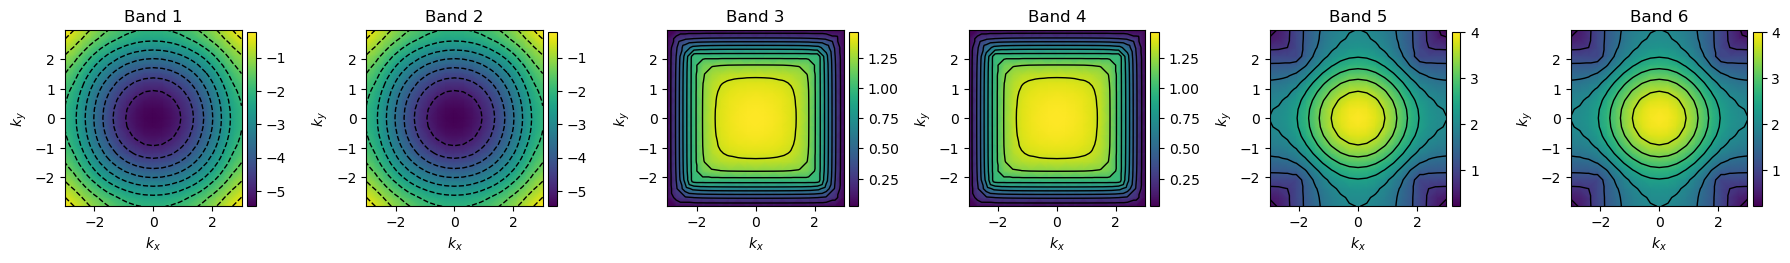

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 3


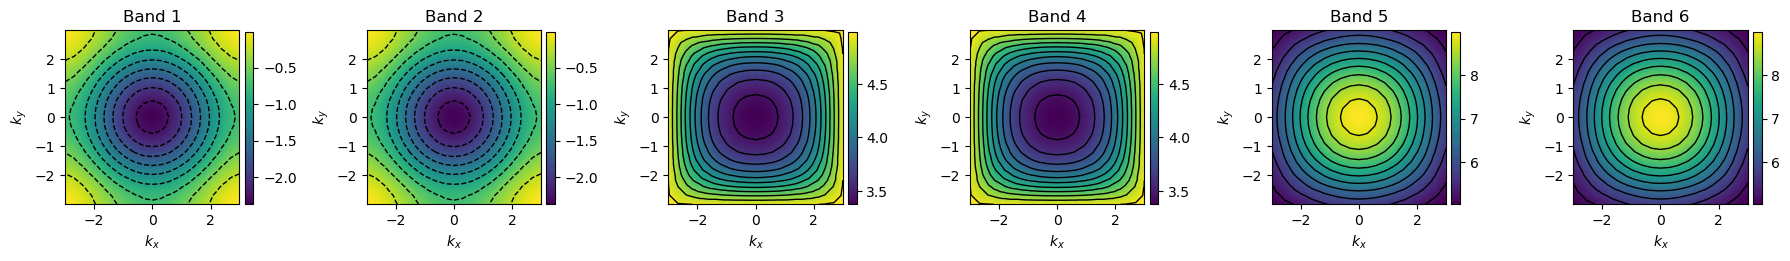

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

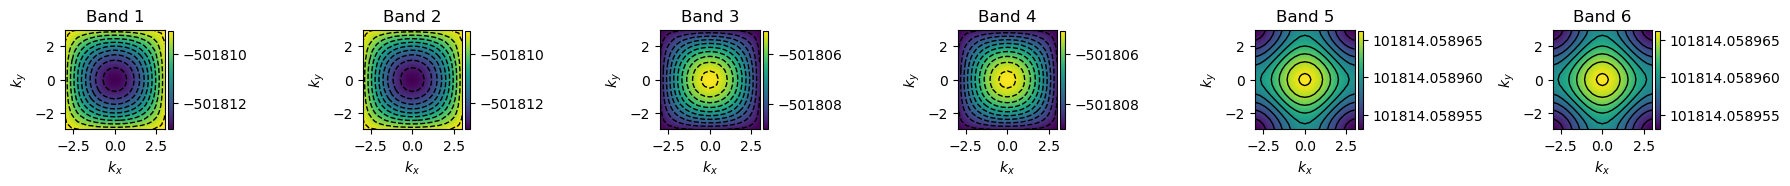

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 0.04
U/T is 79378.74
mean_U is 36805.46


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this image against the rubric to determine if it's correct for the given Hamiltonian problem.

The rubric states:
1. The image should show a momentum space mesh in the first Brillouin zone of the concerned problem.
2. I need to check the point group symmetry.

Let's examine the image:

The image shows a 2D grid of blue dots in a square region, with:
- x-axis labeled as k_x, ranging approximately from -3 to 3
- y-axis labeled as k_y, ranging approximately from -3 to 3
- The dots appear to be evenly spaced in a grid pattern

Analysis:

1. Momentum space mesh in the first Brillouin zone:
   - The image shows a grid of k-points in k-space, which represents a momentum space mesh.
   - For a square lattice (as specified in the problem), the first Brillouin zone is a square in reciprocal space.
   - The image shows a square region of k-space, which is consistent with the first Brillouin zone of a square lattice.
   - The rang

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots shown in the image according to the rubric.

1. Identify the shape of the Brillouin zone boundary:
   From the plots, I can see that the Brillouin zone is square-shaped, with k_x and k_y both ranging from approximately -3 to 3. This matches what's expected for a square lattice, which should have a square Brillouin zone.

2. Examine the symmetry of the energy distribution:

   2.1 Identify the highest energy regions (yellow):
   - In Band 1 and Band 2: The highest energy (yellowish-green regions) appears at the corners of the displayed region.
   - In Band 3 and Band 4: The highest energy (yellow) is in the center square region.
   - In Band 5 and Band 6: The highest energy (yellow) is concentrated in the center.

   2.2 Trace the pattern of energy variation across the zone:
   - Band 1 and Band 2 show circular/radial patterns with energy decreasing toward the center.
   - Band 3 and Band 4 show

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze the provided band structure plots in the image and evaluate whether they correctly represent the interacting-renormalized band structure in the first Brillouin zone after self-consistent Hartree-Fock calculation with infinitesimal interaction.

Let me go through the rubric step by step:

1. **Shape of the Brillouin zone boundary**:
   Looking at all 6 band plots, I can see that the Brillouin zone is square-shaped, with k_x and k_y axes ranging from approximately -2 to 2. This matches what would be expected for a square lattice. The zone boundary forms a square in k-space, which is correct.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions (yellow)**:
   - In Bands 1 & 2: The highest energy regions (yellow) are at the corners of the Brillouin zone.
   - In Bands 3 & 4: Highest energy regions are along the boundaries.
   - In Bands 5 & 6: Highest energy regions are at the center of the Bril

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me analyze this image according to the rubric provided.

The image shows 6 band structure plots labeled "Band 1" through "Band 6". Each plot shows the energy distribution in the first Brillouin zone for a square lattice system after a self-consistent Hartree-Fock calculation with large interaction.

Let's go through the rubric points:

1. **Brillouin zone boundary shape**:
   - The plots show a square boundary with k_x and k_y axes ranging from approximately -2.5 to 2.5. This is consistent with the expected shape for a square lattice, which should have a square Brillouin zone.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions (yellow)**:
   - In Bands 1-2: The highest energy appears to be at the center (Γ point, k_x=0, k_y=0)
   - In Bands 3-4: The highest energy is in a circular pattern around the center
   - In Bands 5-6: The highest energy is at the corners of the Brillouin zone

   2.2 **Pattern of

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '6' saved to final_answer.yaml
